<center>

## Group 12 

</center>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import WordPunctTokenizer
from string import punctuation
from nltk.stem import WordNetLemmatizer
import regex

<center>

### Loading the data
    
</center>

In [3]:
# Load the dataset from CSV
data = pd.read_csv('/Users/dtal/Downloads/archive/ireland-news-headlines.csv')

<center>

### Data Exploration

</center>


In [4]:
print("Shape of the DataFrame: ", data.shape)
print("Number of duplicates: ", data.duplicated().sum())

Shape of the DataFrame:  (1611495, 3)
Number of duplicates:  0


In [5]:
# number of nulls
data.isna().sum()

publish_date         0
headline_category    0
headline_text        7
dtype: int64

In [6]:
# Print the first few rows to check the data
display(data.head())

,publish_date,headline_category,headline_text
0,19960102,news,UUP sees possibility of voting Major out
1,19960102,news,Pubs targeted as curbs on smoking are extended
2,19960102,news,Papers reveal secret links with O'Neill cabinet
3,19960102,news,Domestic chaos as Italy takes EU presidency
4,19960102,news,Learning about the star to which we owe life


In [7]:
# Get information about the dataset, such as column names and data types
display(data.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611495 entries, 0 to 1611494
Data columns (total 3 columns):
 #   Column             Non-Null Count    Dtype 
---  ------             --------------    ----- 
 0   publish_date       1611495 non-null  int64 
 1   headline_category  1611495 non-null  object
 2   headline_text      1611488 non-null  object
dtypes: int64(1), object(2)
memory usage: 36.9+ MB


None

In [8]:
# Summary statistics of the dataset
display(data.describe())

,publish_date
count,1.611495e+06
mean,2.008336e+07
std,7.109984e+04
min,1.996010e+07
25%,2.002091e+07
50%,2.008111e+07
75%,2.014101e+07
max,2.021063e+07


<center>

### Cleaning the data for vizualizations

</center>

In [9]:
# Separating the year, month and day into 3 other columns.

year = [] 
month = [] 
day = [] 

dates = data.publish_date.values

for date in dates:
    str_date = list(str(date))
    year.append(int("".join(str_date[0:4]))) 
    month.append(int("".join(str_date[4:6])))
    day.append(int("".join(str_date[6:8])))

data['year'] = year
data['month'] = month
data['day'] = day

data.drop(['publish_date'] , axis=1,inplace=True) 

In [10]:
data.head()

,headline_category,headline_text,year,month,day
0,news,UUP sees possibility of voting Major out,1996,1,2
1,news,Pubs targeted as curbs on smoking are extended,1996,1,2
2,news,Papers reveal secret links with O'Neill cabinet,1996,1,2
3,news,Domestic chaos as Italy takes EU presidency,1996,1,2
4,news,Learning about the star to which we owe life,1996,1,2


In [11]:
print('Unique Headlines Categories: {}'.format(len(data.headline_category.unique())))


Unique Headlines Categories: 103


In [12]:
set([category for category in data.headline_category if "." not in category] ) 

{'business', 'culture', 'lifestyle', 'news', 'opinion', 'sport'}

In [13]:
data.headline_category = data.headline_category.apply(lambda x: x.split(".")[0]) 

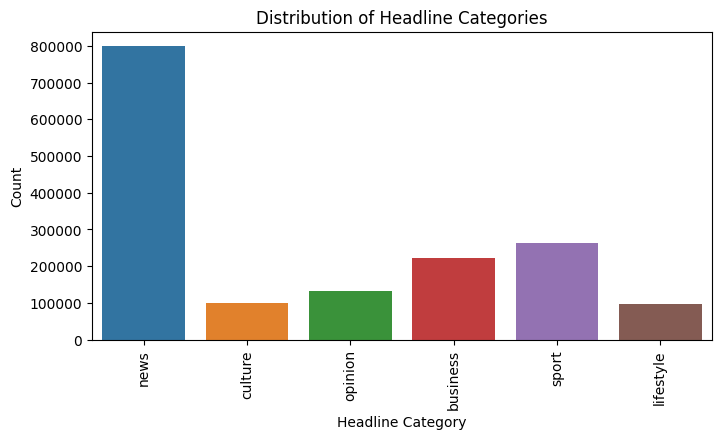

In [14]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=data, x='headline_category')
plt.xticks(rotation=90)
plt.xlabel('Headline Category')
plt.ylabel('Count')
plt.title('Distribution of Headline Categories')
plt.show()

In [15]:
wordnet_lemmatizer = WordNetLemmatizer()

stop = stopwords.words('english')

for punct in punctuation:
    stop.append(punct)

def filter_text(text, stop_words):
    if pd.isnull(text):  # Check for missing values
        return ""
    word_tokens = WordPunctTokenizer().tokenize(text.lower())
    filtered_text = [regex.sub(u'\p{^Latin}', u'', w) for w in word_tokens if w.isalpha()]
    filtered_text = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in filtered_text if not w in stop_words] 
    return " ".join(filtered_text)

In [16]:
data["filtered_text"] = data['headline_text'].apply(lambda x : filter_text(x, stop)) 

In [17]:
data.head()

,headline_category,headline_text,year,month,day,filtered_text
0,news,UUP sees possibility of voting Major out,1996,1,2,uup see possibility vote major
1,news,Pubs targeted as curbs on smoking are extended,1996,1,2,pubs target curb smoke extend
2,news,Papers reveal secret links with O'Neill cabinet,1996,1,2,paper reveal secret link neill cabinet
3,news,Domestic chaos as Italy takes EU presidency,1996,1,2,domestic chaos italy take eu presidency
4,news,Learning about the star to which we owe life,1996,1,2,learn star owe life


<center>

### Relevant Visualization

</center>


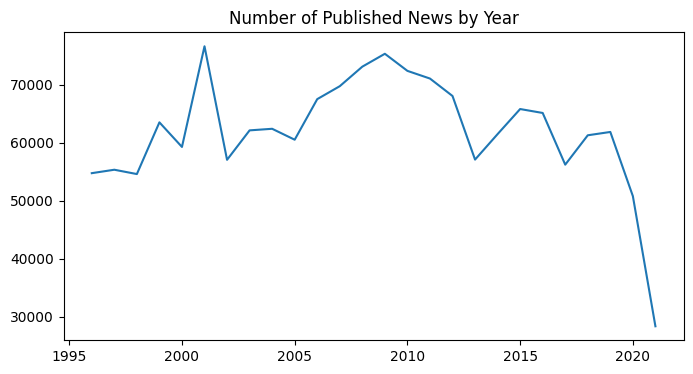

In [18]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(x=data.year.value_counts().index.values,y=data.year.value_counts().values)
ax = plt.title('Number of Published News by Year')

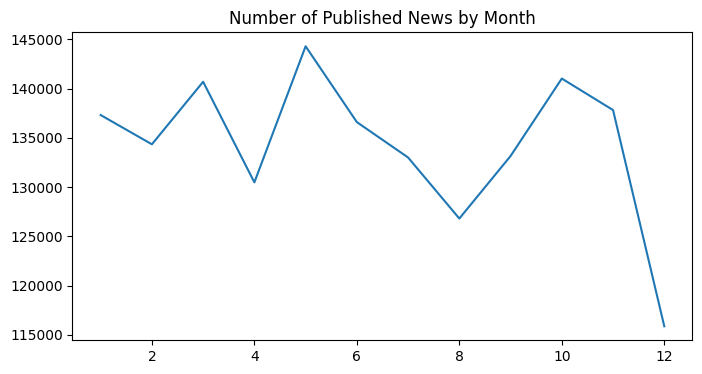

In [19]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(x=data.month.value_counts().index.values,y=data.month.value_counts().values)
ax = plt.title('Number of Published News by Month')

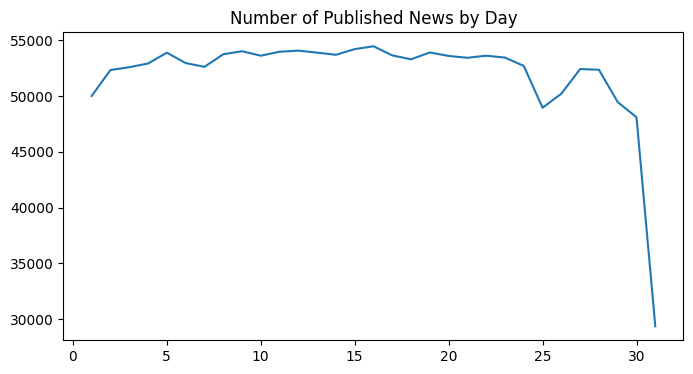

In [20]:
plt.figure(figsize=(8,4))
ax = sns.lineplot(x=data.day.value_counts().index.values,y=data.day.value_counts().values)
ax = plt.title('Number of Published News by Day')

In [21]:
from wordcloud import WordCloud

def make_wordcloud(words,title):
    cloud = WordCloud(width=1920, height=1080,max_font_size=200, max_words=300, background_color="white").generate(words)
    plt.figure(figsize=(8,4))
    plt.imshow(cloud, interpolation="gaussian")
    plt.axis("off") 
    plt.title(title, fontsize=60)
    plt.show()

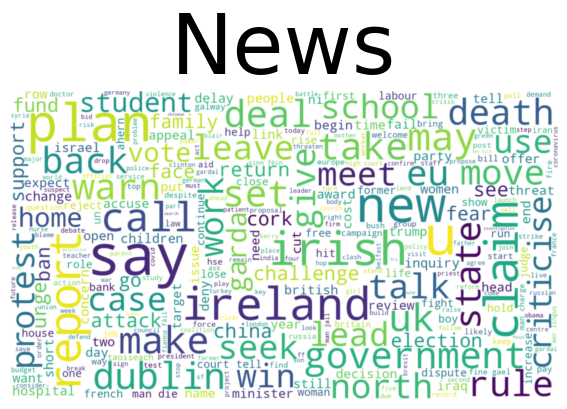

In [22]:
all_text = " ".join(data[data.headline_category == "news"].filtered_text) 
make_wordcloud(all_text, "News") 

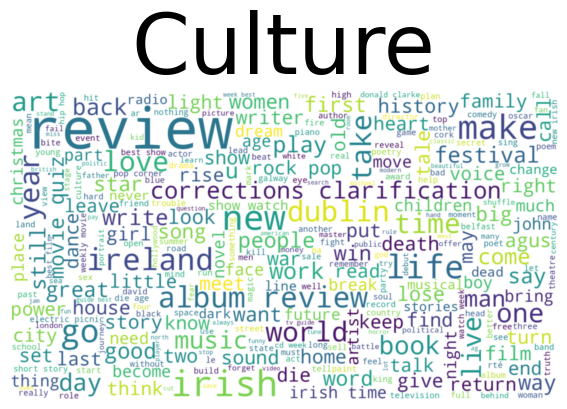

In [23]:
all_text = " ".join(data[data.headline_category == "culture"].filtered_text) 
make_wordcloud(all_text, "Culture")

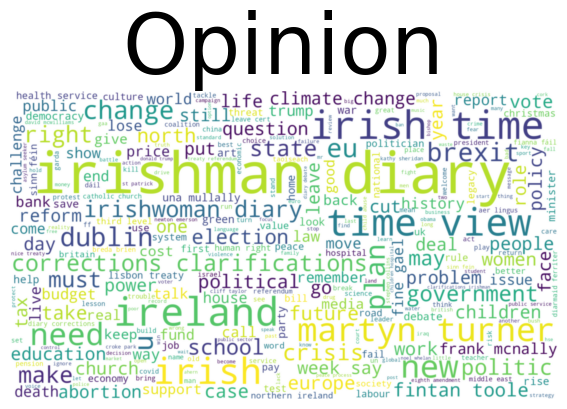

In [24]:
all_text = " ".join(data[data.headline_category == "opinion"].filtered_text) 
make_wordcloud(all_text, "Opinion")

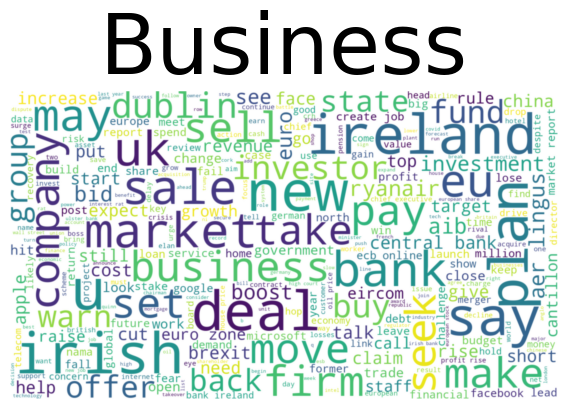

In [25]:
all_text = " ".join(data[data.headline_category == "business"].filtered_text) 
make_wordcloud(all_text, "Business")

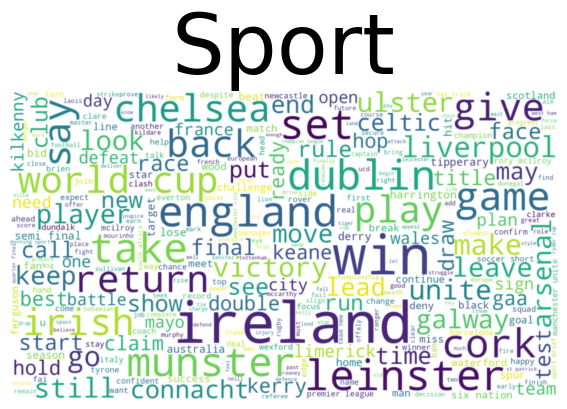

In [26]:
all_text = " ".join(data[data.headline_category == "sport"].filtered_text) 
make_wordcloud(all_text, "Sport")

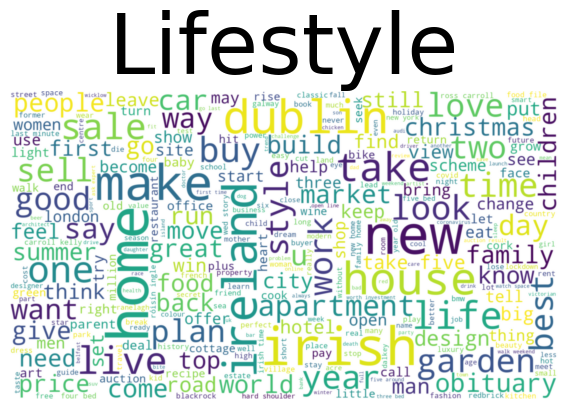

In [27]:
all_text = " ".join(data[data.headline_category == "lifestyle"].filtered_text) 
make_wordcloud(all_text, "Lifestyle")

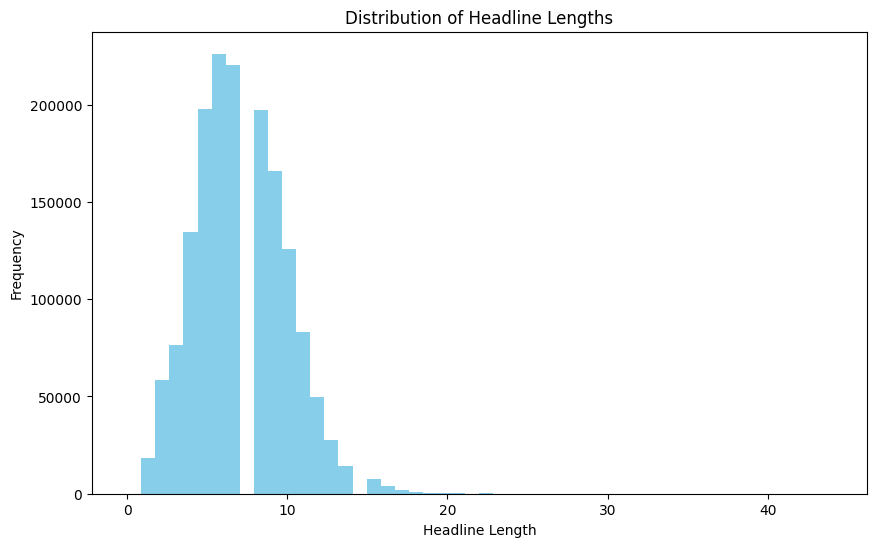

In [28]:
# Histogram of headline lengths
data['headline_length'] = data['headline_text'].astype(str).str.split().apply(lambda x: len(x) if x != ['nan'] else 0)

plt.figure(figsize=(10, 6))
plt.hist(data['headline_length'], bins=50, color='skyblue')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.title('Distribution of Headline Lengths')
plt.show()

<center>

### Processing the Data

</center>

In [29]:
import string
from nltk.corpus import stopwords

# Delete rows with null values in 'headline_text' column
data = data.dropna(subset=['headline_text'])

# Lowercase all letters
data['headline_text_processed'] = data['headline_text'].str.lower()

# Remove stopwords
stopwords_set = set(stopwords.words('english'))
data['headline_text_processed'] = data['headline_text_processed'].apply(lambda text: ' '.join([word for word in text.split() if word not in stopwords_set]))

# Remove punctuation
data['headline_text_processed'] = data['headline_text_processed'].apply(lambda text: text.translate(str.maketrans('', '', string.punctuation)))
data['headline_text_processed'] = data['headline_text_processed'].str.replace('–', '')

# Convert 'headline_category' to the first part of the category
data['headline_main_category'] = data['headline_category'].str.split('.').str[0].str.strip()

In [30]:
from collections import Counter
all_words = ' '.join(data['headline_text_processed']).split()
word_counts = Counter(all_words)
top_50_words = word_counts.most_common(50)
print("50 most common words across all categories:")
for word, count in top_50_words:
    print(word, ":", count)

50 most common words across all categories:
irish : 47860
new : 46992
says : 38197
us : 34764
man : 33166
ireland : 29801
dublin : 29471
may : 20906
court : 20054
eu : 18071
two : 16284
back : 15981
deal : 15058
plan : 14385
set : 14069
home : 13632
time : 13149
first : 13089
world : 12934
get : 12644
report : 12441
cork : 12342
case : 12328
uk : 12267
talks : 11885
take : 11832
bank : 11300
government : 11239
death : 11213
years : 11111
life : 11050
year : 11050
state : 10829
go : 10627
rise : 10558
could : 10399
review : 10357
murder : 10320
one : 10308
win : 10272
pay : 10248
day : 10211
woman : 10111
killed : 10107
make : 10089
tax : 9978
house : 9975
still : 9833
calls : 9737
three : 9662


In [31]:
categories = data['headline_main_category'].unique()
for category in categories:
    category_words = ' '.join(data[data['headline_main_category'] == category]['headline_text_processed']).split()
    category_word_counts = Counter(category_words)
    top_10_words = category_word_counts.most_common(10)
    print(f"\nTop 10 words for category '{category}':")
    for word, count in top_10_words:
        print(word, ":", count)


Top 10 words for category 'news':
says : 29948
man : 29185
new : 23168
us : 21939
irish : 18114
dublin : 16550
court : 16327
eu : 12508
may : 12074
two : 11612

Top 10 words for category 'culture':
review : 5880
irish : 3449
new : 2900
reviews : 1878
music : 1853
best : 1764
week : 1705
life : 1484
album : 1437
dublin : 1326

Top 10 words for category 'opinion':
diary : 6301
irishmans : 5494
irish : 5046
ireland : 2766
times : 2392
view : 2213
new : 2119
time : 1935
crisis : 1774
us : 1609

Top 10 words for category 'business':
irish : 10921
new : 9666
us : 7839
bank : 6391
market : 5666
ireland : 5072
business : 4922
dublin : 4903
says : 4864
rise : 4623

Top 10 words for category 'sport':
ireland : 8833
cup : 7049
irish : 6856
win : 6655
back : 5706
new : 5453
world : 4371
final : 4237
set : 4176
league : 4074

Top 10 words for category 'lifestyle':
new : 3686
irish : 3474
home : 2923
go : 2349
dublin : 2024
house : 1999
ireland : 1660
best : 1436
food : 1362
life : 1355


In [32]:
import pandas as pd
from collections import Counter
import re

# Step 1: Count the number of unique words in 'headline_text_processed'
unique_words_count = len(set(data['headline_text_processed'].str.split(expand=True).stack()))

# Step 2: Get the 50 most common words across all categories
all_words = ' '.join(data['headline_text_processed'])
all_words_count = Counter(all_words.split())
common_words_all = all_words_count.most_common(50)

# Step 3: Get the 10 most common words for each category
common_words_category = {}
for category in data['headline_main_category'].unique():
    category_words = ' '.join(data[data['headline_main_category'] == category]['headline_text_processed'])
    category_words_count = Counter(category_words.split())
    common_words_category[category] = category_words_count.most_common(10)

# Step 4: Find the common words across categories
common_words = []
for word, count in common_words_all:
    if all(word in dict(common_words_category[category]) for category in common_words_category):
        categories = {category: dict(common_words_category[category])[word] for category in common_words_category}
        common_words.append((word, count, categories))

# Step 5: Create the DataFrame
df_common_words_all = pd.DataFrame(common_words_all, columns=['Word', 'Count'])
df_common_words_category = {category: pd.DataFrame(common_words_category[category], columns=['Word', 'Count']) for category in common_words_category}

# Step 6: Find words in top 50 and also in top 10 of at least 2 categories
common_words_top_50 = set(word for word, _ in common_words_all)
common_words_top_10 = set()
for category in common_words_category:
    top_10_words = set(word for word, _ in common_words_category[category])
    common_words_top_10.update(top_10_words)

common_words_filtered = [word for word in common_words_top_50 if common_words_top_10.intersection(set(word for _, _, categories in common_words if any(categories[category] != 0 for category in categories)))]

# Remove dash character from common_words_filtered
common_words_filtered = [word for word in common_words_filtered if '-' not in word]

# Display the results
print("Number of unique words:", unique_words_count)
print("\n50 most common words across all categories:")
print(df_common_words_all)
print("\n10 most common words for each category:")
for category in df_common_words_category:
    print(f"\nCategory: {category}")
    print(df_common_words_category[category])
print("\nWords in top 50 and also in top 10 of at least 2 categories:")
print(common_words_filtered)


Number of unique words: 155157

50 most common words across all categories:
          Word  Count
0        irish  47860
1          new  46992
2         says  38197
3           us  34764
4          man  33166
5      ireland  29801
6       dublin  29471
7          may  20906
8        court  20054
9           eu  18071
10         two  16284
11        back  15981
12        deal  15058
13        plan  14385
14         set  14069
15        home  13632
16        time  13149
17       first  13089
18       world  12934
19         get  12644
20      report  12441
21        cork  12342
22        case  12328
23          uk  12267
24       talks  11885
25        take  11832
26        bank  11300
27  government  11239
28       death  11213
29       years  11111
30        life  11050
31        year  11050
32       state  10829
33          go  10627
34        rise  10558
35       could  10399
36      review  10357
37      murder  10320
38         one  10308
39         win  10272
40         pay  10248


In [33]:
# Create an empty dictionary to store the word frequencies for each category
word_frequencies = {}

# List of words to calculate frequencies for
words_list = ['ireland', 'home', 'life', 'set', 'go', 'man', 'us', 'may','bank','back', 'time', 'review', 'court', 'world', 'says', 'win', 'eu', 'irish', 'dublin', 'rise', 'two', 'house', 'new']

for category in data['headline_main_category'].unique():
    # Filter the DataFrame for the current category
    category_df = data[data['headline_main_category'] == category]
    
    # Concatenate the 'headline_text_processed' column for the category into a single string
    category_text = ' '.join(category_df['headline_text_processed'])
    
    # Calculate the word frequencies for the current category
    word_counts = pd.Series(category_text.split()).value_counts()
    
    # Filter the word frequencies for the words in the list
    filtered_word_counts = word_counts[word_counts.index.isin(words_list)]
    
    # Store the filtered word frequencies in the dictionary
    word_frequencies[category] = filtered_word_counts

# Create a DataFrame to store the word frequencies
word_frequency_df = pd.DataFrame()

# Add the 'word' column with the unique words from the words list
word_frequency_df['word'] = words_list

# Iterate over each category and add the frequency counts to the DataFrame
for category, frequencies in word_frequencies.items():
    word_frequency_df[category] = word_frequency_df['word'].apply(lambda word: frequencies.get(word, 0))

# Calculate the total frequency by summing the counts across all categories
word_frequency_df['total'] = word_frequency_df.iloc[:, 1:].sum(axis=1)

# Print the resulting DataFrame
print(word_frequency_df)


       word   news  culture  opinion  business  sport  lifestyle  total
0   ireland  10147     1323     2766      5072   8833       1660  29801
1      home   6027      551      604      1152   2375       2923  13632
2      life   5198     1484      686      1553    774       1355  11050
3       set   6551      304      147      2539   4176        352  14069
4        go   3851      710      281      1115   2321       2349  10627
5       man  29185      781      275       506   1928        491  33166
6        us  21939      705     1609      7839   1807        865  34764
7       may  12074      416      740      4315   2914        447  20906
8      bank   4212       90      355      6391     95        157  11300
9      back   5526      896      600      2289   5706        964  15981
10     time   4306     1005     1935      1657   3077       1169  13149
11   review   2921     5880      148       959    228        221  10357
12    court  16327       76      322      2868    379         82

In [37]:
# List of words to remove
words_to_remove = ['ireland', 'home', 'life', 'set', 'go', 'man', 'us', 'may','bank','back', 'time', 'review', 'court', 'world', 'says', 'win', 'eu', 'irish', 'dublin', 'rise', 'two', 'house', 'new']

# Convert the list to a regular expression pattern
pattern = r'\b(?:{})\b'.format('|'.join(words_to_remove))

# Remove the words from the 'headline_text_processed' column
data['headline_text_processed_no_common'] = data['headline_text_processed'].str.replace(pattern, '', regex=True)


In [38]:
data

,headline_category,headline_text,year,month,day,filtered_text,headline_length,headline_text_processed,headline_main_category,headline_text_processed_no_common
0,news,UUP sees possibility of voting Major out,1996,1,2,uup see possibility vote major,7,uup sees possibility voting major,news,uup sees possibility voting major
1,news,Pubs targeted as curbs on smoking are extended,1996,1,2,pubs target curb smoke extend,8,pubs targeted curbs smoking extended,news,pubs targeted curbs smoking extended
2,news,Papers reveal secret links with O'Neill cabinet,1996,1,2,paper reveal secret link neill cabinet,7,papers reveal secret links oneill cabinet,news,papers reveal secret links oneill cabinet
3,news,Domestic chaos as Italy takes EU presidency,1996,1,2,domestic chaos italy take eu presidency,7,domestic chaos italy takes eu presidency,news,domestic chaos italy takes presidency
4,news,Learning about the star to which we owe life,1996,1,2,learn star owe life,9,learning star owe life,news,learning star owe
...,...,...,...,...,...,...,...,...,...,...
1611490,news,Reserve members of Defence Forces to be allowe...,2021,6,30,reserve members defence force allow serve over...,14,reserve members defence forces allowed serve o...,news,reserve members defence forces allowed serve o...
1611491,culture,Maureen Dowd: Joe Biden is 'crazy about the Ir...,2021,6,30,maureen dowd joe biden crazy irish plan celebr...,18,maureen dowd joe biden crazy irish plans celeb...,culture,maureen dowd joe biden crazy plans celebrate ...
1611492,sport,Andy Murray rolls back the years to own Centre...,2021,6,30,andy murray roll back years centre court,11,andy murray rolls back years centre court,sport,andy murray rolls years centre
1611493,news,Delta variant could do 'significant damage' in...,2021,6,30,delta variant could significant damage partial...,12,delta variant could significant damage partial...,news,delta variant could significant damage partial...
